# 시계열 데이터 사례 분석

잘 알려진 작은 시계열 데이터를 토대로 시계열 데이터의 안정성 기념을 시각적으로 따져봅시다.

데이터는 `./data` 폴더에 저장되어 있습니다.

- [멜버른의 기온 데이터](#Time-Series-생성)
- [월별 항공승객 수 데이터](#다른-데이터에-대해서도-비교해보자.-\--월별-항공승객-수-데이터)


## Time Series 생성

첫 번째로 다루어볼 데이터는 `Daily Minimum Temperatures in Melbourne` 입니다. 온도 변화를 다루는 시계열인 만큼 안정성이 있지 않을까요?

In [1]:
# 필요한 모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
dataset_path = os.path.dirname(os.path.abspath('__file__'))
df = pd.read_csv(dataset_path + r'/data/daily-min-temperatures.csv')
print(df.shape)
df.head(10)

(3650, 2)


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
5,1981-01-06,15.8
6,1981-01-07,15.8
7,1981-01-08,17.4
8,1981-01-09,21.8
9,1981-01-10,20.0


Pandas에서 제공하는 Series 자료구조가 있습니다. 오늘 다루게 될 시계열 (Time Series)도 결국 시간 칼럼을 인덱스로 하는 Series로 표현됩니다. 우리가 읽어들인 뎅티ㅓ 파일은 2개의 칼럼을 가진 DataFrame으로 변환되었습니다.

위의 DataFrame에서 Date 칼럼을 인덱스로 삼아 Time Series를 생성해봅시다.

In [3]:
dataset_path += r'/data/daily-min-temperatures.csv'
df = pd.read_csv(dataset_path, index_col = 'Date', parse_dates=True)
print(type(df))
df.head(10)

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8
1981-01-07,15.8
1981-01-08,17.4
1981-01-09,21.8


시간 컬럼이 index가 되었지만 아직도 type은 DataFrame으로 나옵니다. 우리가 찾는 Time Series는 바로 여기 있습니다.

In [4]:
ts1 = df['Temp']
print(type(ts1))
ts1.head(10)

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
1981-01-07    15.8
1981-01-08    17.4
1981-01-09    21.8
1981-01-10    20.0
Name: Temp, dtype: float64

DataFrame인 df와 Series인 df\['Temp'\]는 인덱스 구조가 동일하므로 Numpy, Pandas, Matplotlib 등 많은 라이브러리들이 호환해서 지원해 줍니다. 하지만 그렇지 않은 경우도 간혹 발생하므로 여기서는 명확하게 Series 객체를 가지고 진행하도록 하겠습니다.

## 시계열 안정성의 정성적 분석

이제 Time Seires가 준비되었습니다. 시각화를 통해 **안정성(Stationary)** 여부를 확인해봅시다.

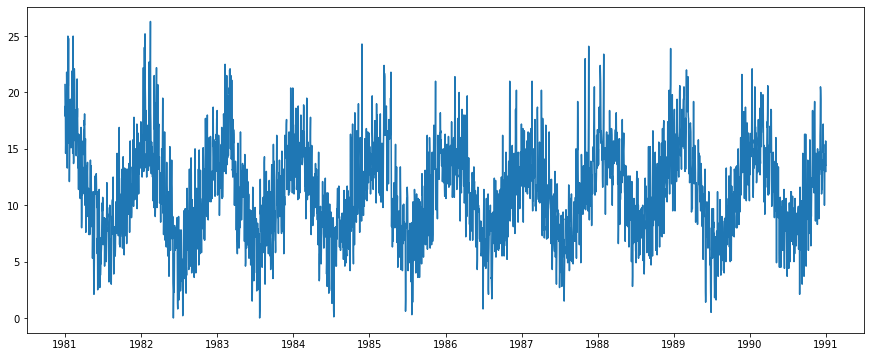

In [5]:
from matplotlib.pyplot import rcParams

# matlab 차트의 기본 크기를 15, 6으로 지정해줍니다.
rcParams['figure.figsize'] = 15, 6 

# time series 데이터를 차트로 그려줍니다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

좋습니다. 멋진 차트가 그려졌군요.

하지만 분석에 들어가기 전에 잊지 말아야 할 단계가 하나 있습니다. 바로 결측치 유무 확인입니다.

In [6]:
ts1[ts1.isna()]

Series([], Name: Temp, dtype: float64)

어떻습니까? 다행히 이 데이터에는 결측치가 없군요. 하지만 혹시 결측치가 있다면 조치가 필요합니다. NaN이 들어있는 데이터는 통계분석시에 많은 오류를 일으킬 뿐더러 분석결과에도 악영향을 미칠 것입니다.

만약 결측치가 있다면, 

- 1) 결측치가 있는 데이터를 모두 삭제(drop)하거나, 
- 2) 결측치 양 옆의 값들을 이용해서 적절히 보간(interpolate) 대입

하는 방법이 있습니다. 2와 4 사이 데이터가 NaN이라면 이 값을 3으로 채우는 방식인 거죠. 이번 경우라면 시간을 인덱스로 가지는 시계열 데이터이므로 삭제하는 것보다는 보간하는 방법을 선택하겠습니다.

Pandas에서 결측치 보간을 처리하는 메소드는 다음과 같습니다. 상세한 설명은 이 [아티클](https://rfriend.tistory.com/264)을 참고해 주세요.


In [7]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')
ts1[ts1.isna()]    # 다시 NaN 확인

Series([], Name: Temp, dtype: float64)

어떻습니까? 이전 스텝에서 보았던 시간 추이에 따라 일정한 평균, 분산, 자기공분산의 패턴이 나타나는 것 같습니까? 직관적으로 그래 보이긴 합니다만, 시계열 데이터의 통계적 특성을 좀더 명료하게 시각화해 보겠습니다.

아래는 일정 시간내 *구간 통계치(Rolling Statistics)* 를 시각화해 보는 함수입니다. 현재 타임스텝부터 `window`에 주어진 타임스텝 이전 사이 구간의 평균(rolling mean, 이동평균)과 표준편차(rolling std, 이동표준편차)를 원본 시계열과 함께 시각화해 보면 좀더 뚜렷한 경향성을 확인할 수 있을 것입니다.



In [8]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean() # 이동 평균 시계열
    rolstd = timeseries.rolling(window=window).std() # 이동 표준편차 시계열
    
    # 원본 시계열, 이동평균, 이동표준편차를 plot으로 시각화해봅시다.
    orig = plt.plot(timeseries, color='blue', label = 'Original')
    mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title("Rolling Mean & Standard Derivatioin")
    plt.show(block = False)

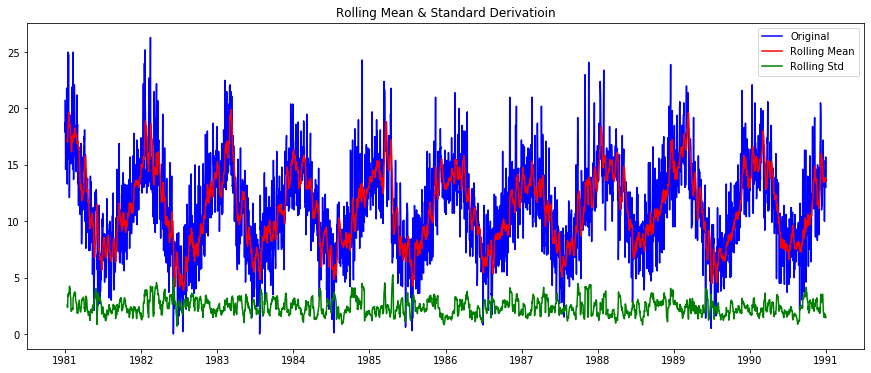

In [9]:
plot_rolling_statistics(ts1, window=12)

이 시계열 데이터가 안정적이라고 명확하게 결론을 내릴 수 있을까요? 시각화 해보면 그렇다는 느낌은 들지만 명확하게 그렇다고 결론을 내릴 수 있을지는 잘 모르겠습니다. 좀 다른 패턴의 시계열 데이터와 비교해 보면 어떨까요?


# 다른 데이터에 대해서도 비교해보자. - 월별 항공승객 수 데이터


이번에는 `International airline passengers` 데이터셋입니다. 월별 항공승객 수(천명단위)의 시계열 데이터인데 기온 변화 데이터셋과는 조금 다른 패턴이나타날 것 같습니다!


In [10]:
dataset_path = os.path.dirname(os.path.abspath('__file__'))
dataset_path += r'/data/airline-passengers.csv'
df = pd.read_csv(dataset_path, parse_dates=True, index_col = 'Month').fillna(0)

In [11]:
df.head(10)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


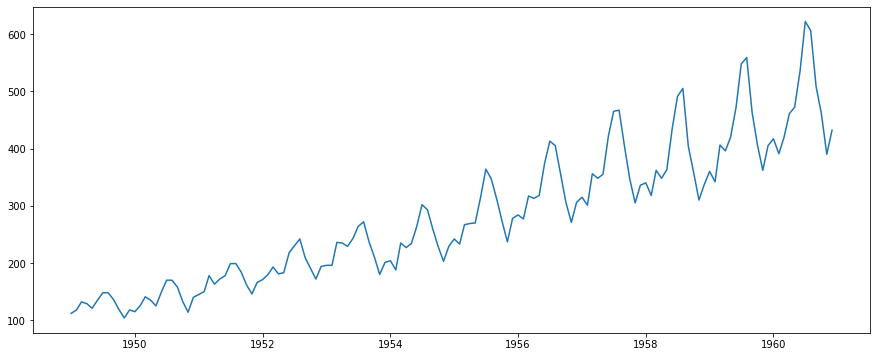

In [12]:
ts2 = df['Passengers']
plt.plot(ts2)

직관적으로 봐도 온도변화 데이터셋과는 다른 패턴이 보입니다. 시간의 추이에 따라 시계열의 평균과 분산이 지속적으로 커지는 패턴을 보입니다. rolling statistics를 추가해서 시각화해 보겠습니다.

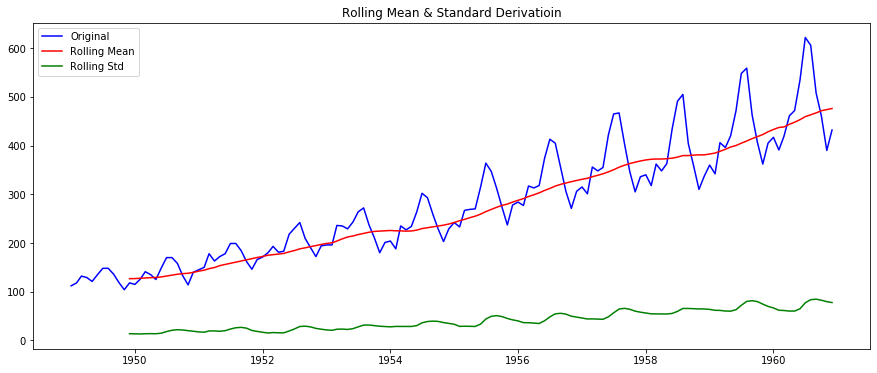

In [13]:
plot_rolling_statistics(ts2, window=12)

이렇게 시간의 추이에 따라 평균과 분산이 증가하는 패턴을 보인다면 이 시계열 데이터는 적어도 안정적이진 않다고 정성적인 결론을 내려볼 수 있을 것 같습니다. 그렇다면 이런 시계열 데이터에 대해서는 시계열 예측을 시도할 수 없는 것일까요? 그렇다면 이번 노드는 너무 재미가 없겠지요? 이후 스텝들에는 이런 불안정적(Non-Stationary) 시계열 데이터에 대한 시계열 분석 기법을 다루어 볼 것입니다.

위와 같이 우리는 시계열 데이터의 안정성을 시각화 방법을 통해 정성적으로 분석해 볼 수 있습니다. 이것은 시계열 데이터를 다루는 가장 기본적인 접근법이라 할 수 있습니다. 하지만 시계열 데이터의 안정성을 평가하는 데는 보다 정량적인 방법이 있을 것 같습니다.

# Stationary 여부를 체크하는 통계적 방법

> Augmented Dickey-Fullter Test

이번 스텝에서는 **Augmented Dickey-Fuller Test**라는 시계열 데이터의 안정성을 테스트하는 통계적 방법을 소개하려고 합니다. 이 테스트는 `주어진 시계열 데이터가 안정적이지 않다`라는 *귀무가설(Null Hypothesis)* 를 세운 후, `통계적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우에 이 시계열 데이터가 안정적이다`라는 *대립가설(Alternative Hypothesis)* 을 채택한다는 내용입니다.

이미 여기까지의 설명만으로도 머리가 굳어버리는 느낌을 받으실 수도 있을 것 같습니다. 시계열 분석은 탄탄한 통계학적 기반에 입각한 만큼 제대로 이해하기 위해서는 전문적인 훈련이 필요합니다. 그래서 Augmented Dickey-Fuller Test의 세부 알고리즘은 생략하고, `statsmodels` 패키지에서 제공하는 `adfuller` 메소드를 이용해 손쉽게 Augmented Dickey-Fuller Test의 결과를 이용할 것입니다. 세부 알고리즘을 좀더 파악하고 싶으시다면 이 글을 추천합니다.

## P-value

하지만 통계적 가설 검정의 기본 개념을 이루는 `p-value` 등의 용어에 대해서는 한번쯤 짚고 넘어가는 것이 이후 과정의 이해를 도울 것이라고 판단됩니다. 다음 링크의 글들을 읽고 질문에 답해 보세요.

- [유의확률 - 위키백과](https://ko.wikipedia.org/wiki/%EC%9C%A0%EC%9D%98_%ED%99%95%EB%A5%A0)
- [P-value(유의확률)의 개념](https://m.blog.naver.com/baedical/10109291879)

`p-value`의 정의는 귀무가설을 가정했을 때의 확률분포 상에서 현재의 관측보다 더 극단적인 관측이 나올 확률로서, 귀무가설의 가정이 틀렸다고 볼 수 있는 확률이기도 하다. 이 값이 0.05 미만으로 매우 낮게 나온다면 p-value만큼의 오류가능성 하에 귀무가설을 기각하고 대립가설을 채택할 수 있는 근거가 된다.

## `statsmodels` 패키지와 `adfuller` 메소드

statsmodels 패키지는 R에서 제공하는 통계검정, 시계열분석 등의 기능을 파이썬에서도 이용할 수 있도록 하는 강력한 통계 패키지입니다. 이번 노드에서는 statsmodels 패키지의 기능을 자주 활용하게 될 것입니다. 아래는 statsmodels 패키지에서 제공하는 adfuller 메소드를 이용해 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드입니다.

아래 코드를 수행하기 위해 먼저 다음과 같이 statsmodels 패키지를 설치합니다.

```bash
$ pip install statsmodels
```

In [18]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodel 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag = 'AIC')
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print("Results of Dickey-Fuller Test:")
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

In [19]:
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


`Daily Minimum Temperatures in Melbourne` 시계열이 안정적이지 않다라는 귀무가설은 p-value가 거의 0에 가깝게 나타났습니다. 따라서 이 귀무가설은 기각되고, 이 시계열은 안정적 시계열이라는 대립가설이 채택됩니다.

In [20]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


`International airline passengers` 시계열이 안정적이지 않다라는 귀무가설은 p-value가 거의 1에 가깝게 나타났습니다. 이것이 바로 이 귀무가설이 옳다는 직접적인 증거가 되지는 않지만, 적어도 이 귀무가설을 기각할 수는 없게 되었으므로 이 시계열이 안정적인 시계열이라고 말할 수는 없습니다.

# 그럼 시계열 데이터를 Stationary 하게 만들 방법은 없을까?

이제 우리는 위에서 안정적이라고 말할 수 없게 된 International airline passengers 시계열을 좀더 분석해 보겠습니다. 이전 스텝에서도 언급했듯, 안정적이지 않은 시계열을 분석하려면 이것을 안정적인 시계열로 바꾸어 내야 합니다. 이것이 어떻게 가능할까요?

크게 두가지를 언급할 것입니다. 

- 한가지는 정성적인 분석을 통해 보다 Stationary한 특성을 가지도록 기존의 시계열 데이터를 가공/변형하는 시도들이고, 
- 다른 하나는 시계열 분해(Time series decomposition)라는 기법을 적용하는 것입니다.

## 보다 Stationary한 시계열로 가공해가기

### 1. 로그 함수 변환

가장 먼저 고려해 볼 수 있는 것은 시간 추이에 따라 분산이 점점 커지고 있다는 점입니다. 시계열이 이런 특성을 보일 경우에는 로그함수로 변환을 해주는 것이 도움이 됩니다.

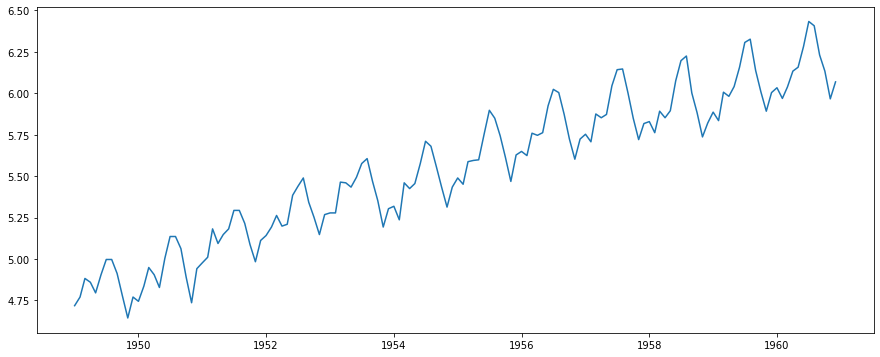

In [21]:
ts_log = np.log(ts2)
plt.plot(ts_log)

로그 변환의 효과가 어떠했는지 따져 보기 위해 Augmented Dickey-Fuller Test를 수행해 봅시다.

In [22]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


p-value가 0.42로 무려 절반 이상 줄어들었습니다. 정성적으로도 시간 추이에 따른 분산이 일정해진 것을 확인할 수 있습니다. 아주 효과적인 변환이었던 것 같습니다. 하지만 아직은 갈길이 멉니다. 가장 두드러지는 문제점은 시간 추이에 따라 평균이 계속 증가한다는 점입니다.


### 2. Moving average 제거 - Trend 상쇄하기

시계열 분석에서 위와 같이 시간 추이에 따라 나타나는 평균값 변화를 **트렌드(trend)** 라고 합니다. 이 변화량을 제거해 주려면 거꾸로 Moving Average, 즉 rolling mean을 구해서 ts_log에다 빼주면 어떨까요?

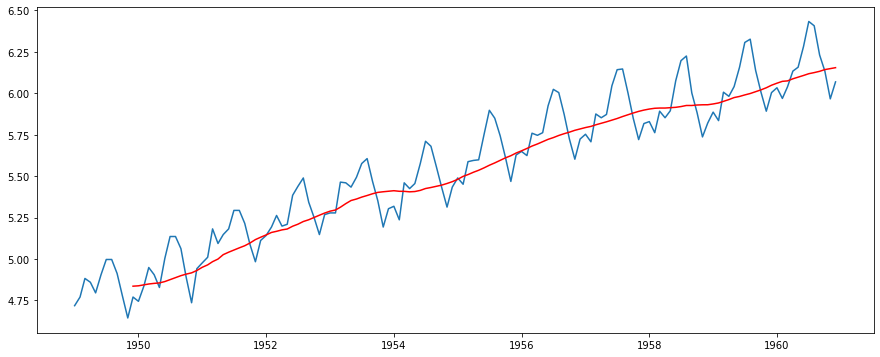

In [24]:
moving_avg = ts_log.rolling(window=12).mean() # moving average를 구한다!!
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()

In [25]:
#moving average를 구해서 ts_log에다가 빼줍니다.
ts_log_moving_avg = ts_log - moving_avg
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

우리가 관심을 가진 ts_log_moving_avg에 거의 도달했습니다. 그런데 문제는 Moving Average 계산시 (windows size=12인 경우) 앞의 *11개의 데이터는 Moving Average가 계산되지 않으므로 ts_log_moving_avg에 NaN이 발생한다*는 점입니다.

이 결측치들은 향후 Dicky-Fuller Test 시에 에러를 발생시킬 것이므로 이를 **데이터셋에서 제거**해 줍니다.

In [26]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

이제 이전 스텝에서 정의했던 메소드들을 활용하여 ts_log_moving_avg를 정성, 정량적으로 분석해 봅시다.

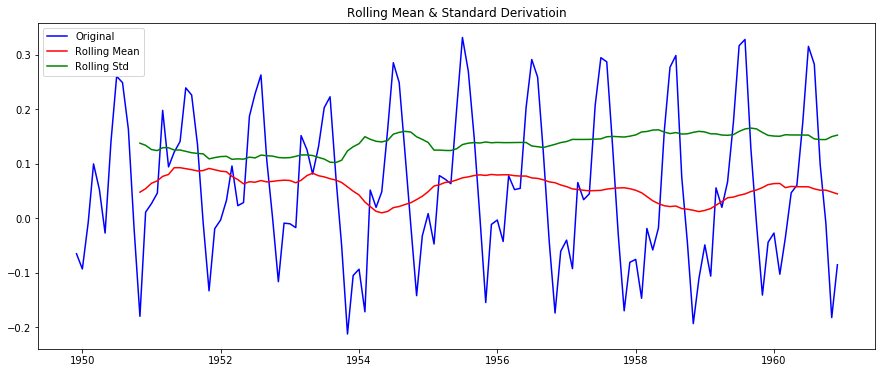

In [27]:
plot_rolling_statistics(ts_log_moving_avg)

In [28]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


드디어 p-value가 0.02 수준이 되었습니다. 95% 이상의 confidence로 이 time series는 stationary하다고 할 수 있겠습니다.

그러나 지금까지의 접근에서 한가지 숨겨진 문제점이 있습니다.<br/>
바로 Moving Average를 계산하는 window=12으로 정확하게 지정해 주어야 한다는 점입니다.

만약 위 코드에서 window=6을 적용하면 어떤 결과가 나올까요?

In [29]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6

ts_log_moving_avg_6.dropna(inplace=True)

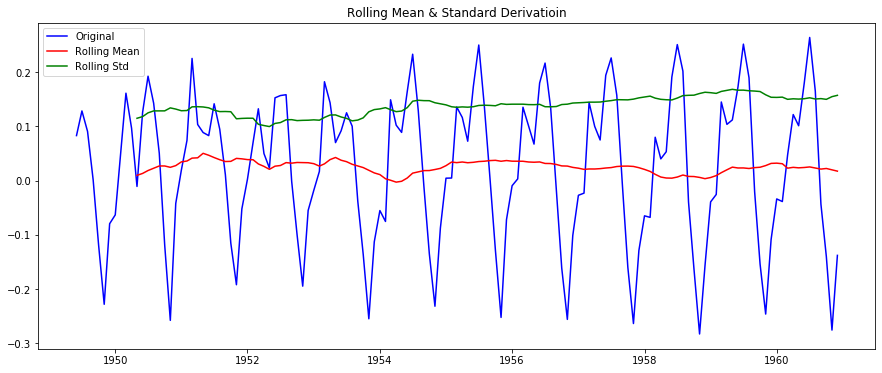

In [30]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [31]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


그래프를 정성적으로 분석해서는 window=12일 때와 별 차이를 느낄수 없지만 Augmented Dickey-Fuller Test의 결과 p-value는 0.18 수준이어서 아직도 안정적 시계열이라고 말할 수 없게 되었습니다.

이 데이터셋은 월단위로 발생하는 시계열이므로 12개월 단위로 주기성이 있기 때문에 window=12가 적당하다는 것을 추측할 수도 있을 것 같습니다만, **moving average를 고려할 때는 rolling mean을 구하기 위한 window 크기를 결정하는 것이 매우 중요**하다는 것을 기억해 둡시다.

이제 시간의 추이에 따라 평균이 증가하는 trend를 제거하였습니다. 그러나 여전히 안정적인 시계열이라고 하기에는 마음에 걸리는 부분이 있습니다.


### 차분(Differencing) - Seasonality 상쇄하기

Trend에는 잡히지 않지만 시계열 데이터 안에 포함된 패턴이 파악되지 않은 *주기적 변화*는 예측에 방해가 되는 불안정성 요소입니다. 이것은 Moving Average 제거로는 상쇄되지 않는 효과입니다. 이런 계절적, 주기적 패턴을 **Seasonality**라고 합니다.

이런 패턴을 상쇄하기 위해 효과적인 방법에는 **차분(Differencing)** 이 있습니다. 마치 미분(Differentiation)을 떠올리게 하는 개념인데요, *시계열을 한 스텝 앞으로 시프트한 시계열을 원래 시계열에 빼 주는 방법*입니다. 이렇게 되면 남은 것은 현재 스텝 값 - 직전 스텝 값이 되어 정확히 *이번 스텝에서 발생한 변화량을 의미*하게 됩니다. 이 변화량 시계열은 어떤 패턴을 보이게 될까요?

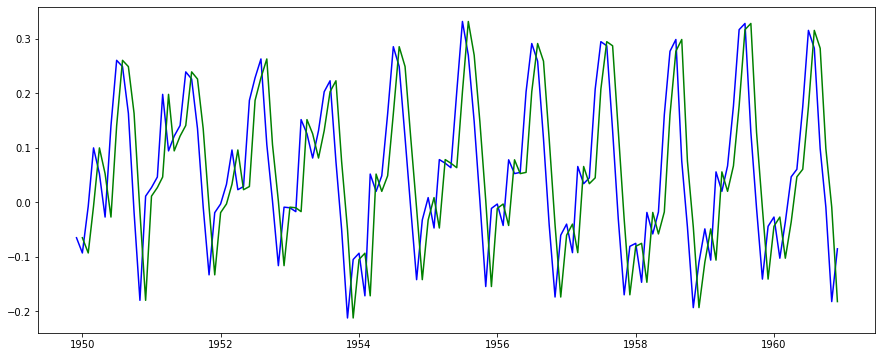

In [33]:
# 원래 값에서 shift!!
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color = 'blue')
plt.plot(ts_log_moving_avg_shift, color='green')
plt.show()

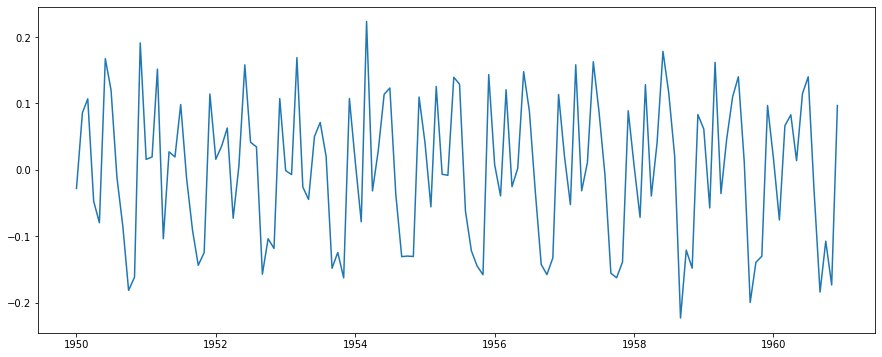

In [34]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

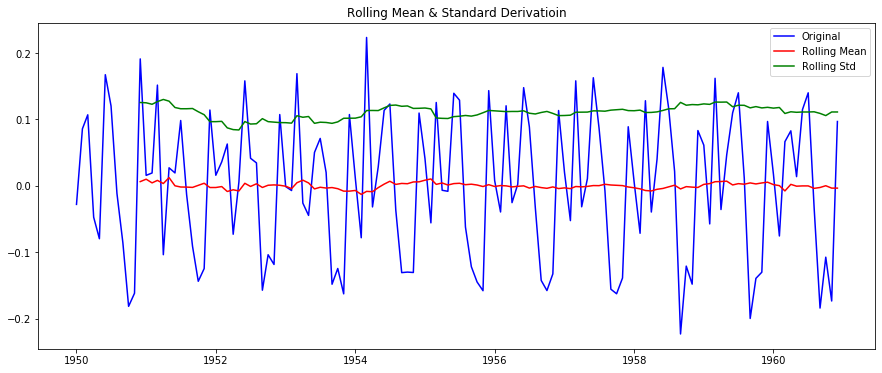

In [35]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [36]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


Trend를 제거하고 난 시계열에다가 1차 차분(1st order differencing)을 적용하여 Seasonality 효과를 다소 상쇄한 결과, p-value가 이전의 10% 정도까지로 줄어들었습니다. 데이터에 따라서는 2차 차분(2nd order differencing, 차분의 차분), 3차 차분(3rd order differencing, 2차 차분의 차분)을 적용하면 더욱 p-value를 낮출 수 있을지도 모릅니다.

### 시계열 분해(Time series decomposition)

`statsmodels` 라이브러리 안에는 `seasonal_decompose` 메소드를 통해 time series 안에 존재하는 trend, seasonality를 직접 분리해 낼 수 있는 기능이 있습니다. 이 기능을 활용하면 우리가 위에서 직접 수행했던 moving average 제거, differencing 등을 거치지 않고도 훨씬 안정적인 시계열을 분리해 낼 수 있게 됩니다. 이번에는 위에서 구했던 로그변환 단계(ts_log)에서부터 출발해 봅시다.

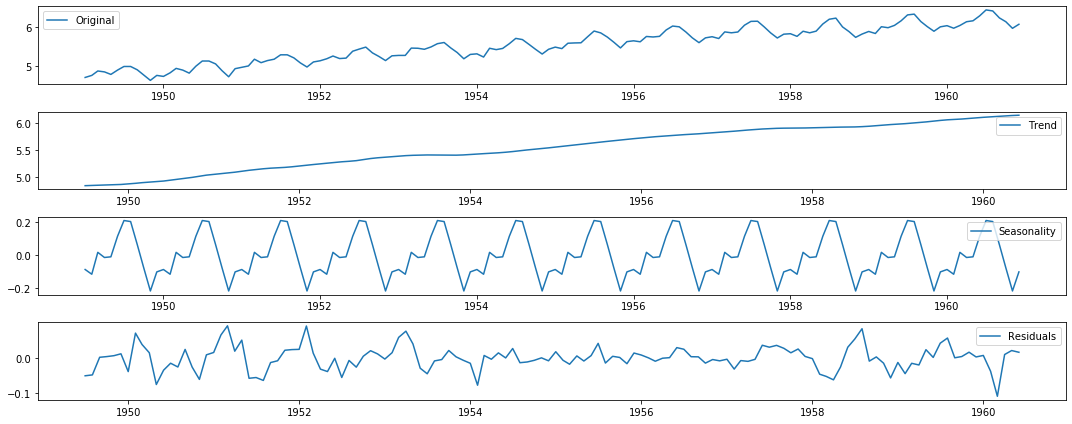

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

*Original 시계열에서 Trend와 Seasonality를 제거하고 난 나머지*를 **Residual**이라고 합니다. 뒤집어서 말하면 **`Trend+Seasonality+Residual=Original`** 이 성립한다는 뜻입니다. 이러한 Decomposing은 시계열 데이터를 이해하는 중요한 관점을 제시해 줍니다.

그렇다면 이제 `Residual`에 대해 안정성 여부를 따져 봅시다.


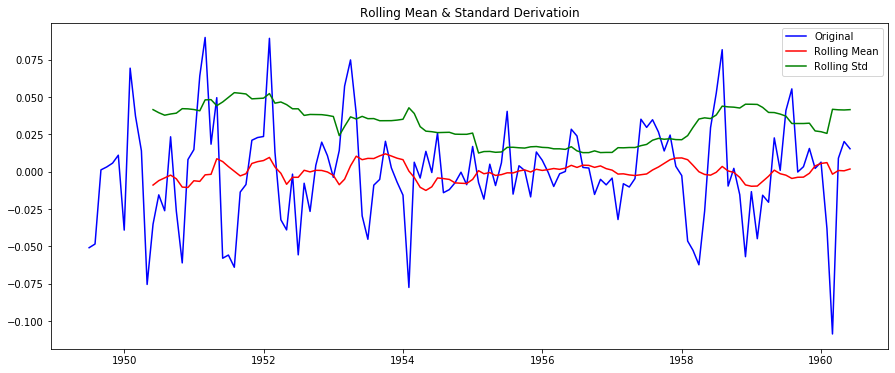

In [42]:
plot_rolling_statistics(residual)

In [43]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


`Decomposing`을 통해 얻어진 *Residual은 압도적으로 낮은 p-value를 보여 줍니다.* 이정도면 확실히 예측 가능한 수준의 안정적인 시계열이 얻어졌다고 볼 수 있겠습니다. 어쩌면 굳이 애써 직접 `Trend`, `Seasonality`를 제거하려고 애쓸 필요가 없이 바로 `Time Series Decomposing`을 시도하는 게 더 낫지 않았을까요? 물론 그렇긴 합니다만, 이렇게 `Trend`와 `Seasonality`를 제거해 주는 것이 어떤 효과를 발휘하게 되는지를 단계적으로 확인하는 과정이었다고 이해해 주시면 좋겠습니다.


# ARIMA 모델의 개념

이전 스텝에서 우리는 시계열 데이터가 `Trend`와 `Seasonality`와 `Residual`로 Decompose되며, `Trend`와 `Seasonality`를 효과적으로 분리해 낸 경우 아주 예측력 있는 안정적인 시계열 데이터로 변환 가능하다는 것을 확인하였습니다.

바로 이런 원리를 활용하여 시계열 데이터 예측모델을 자동으로 만들어 주는 모델이 있습니다. 바로 오늘 소개하게 될 **ARIMA(Autoregressive Integrated Moving Average)** 입니다.

ARIMA는 `AR(Autoregressive)` + `I(Integrated)` + `MA(Moving Average)`가 합쳐진 모델입니다. 각각의 개념을 하나하나 살펴보면 바로 지금까지 우리가 다루어온 개념들과 닮아 있음을 알게 됩니다.

시계열 데이터 Y = {Yt : t ∈ T }를 생각해 봅시다. Yt 를 예측하기 위해서 다음과 같은 모델들을 생각해 볼 수 있습니다.


## AR(자기회귀, Autoregressive)

![img](https://aiffelstaticprd.blob.core.windows.net/media/images/E-16-2_nh8iD9A.max-800x600.png)

- 자기회귀(AR)란 Yt가 이전 p개의 데이터 Y
t
−
1
,
Y
t
−
2
,
.
.
.
,
Y
t
−
p
 의 가중합으로 수렴한다고 보는 모델입니다.
- 가중치의 크기가 1보다 작은 
Y
t
−
1
,
Y
t
−
2
,
.
.
.
,
Y
t
−
p
 의 가중합으로 수렴하는 자기회귀 모델과 안정적 시계열은 통계학적으로 동치입니다.
- AR은 일반적인 시계열에서 Trend와 Seasonality를 제거한 Residual에 해당하는 부분을 모델링한다고 볼 수 있습니다.
- 주식값이 항상 일정한 균형 수준을 유지할 것이라고 예측하는 관점이 바로 주식 시계열을 AR로 모델링하는 관점이라고 볼 수 있습니다.


## MA(이동평균, Moving Average)


![img](https://aiffelstaticprd.blob.core.windows.net/media/images/E-16-3.max-800x600.png)

- 이동평균(MA)은 
Y
t
가 이전 q개의 예측오차값 
e
t
−
1
,
e
t
−
2
,
.
.
.
,
e
t
−
q
 의 가중합으로 수렴한다고 보는 모델입니다.
- MA는 일반적인 시계열에서 Trend에 해당하는 부분을 모델링한다고 볼 수 있습니다. 예측오차값 
e
t
−
1
이 +라면 모델 예측보다 관측값이 더 높았다는 뜻이므로, 다음 
Y
t
 예측시에는 예측치를 올려잡게 됩니다.
- 주식값은 항상 최근의 증감 패턴이 지속될 것이라고 예측하는 관점이 바로 주식 시계열을 MA로 모델링하는 관점이라고 볼 수 있습니다.

> I (차분누적, Integration)

- 차분누적은 
Y
t
이 이전 데이터와 d차 차분의 누적(integration) 합이라고 보는 모델입니다.
- 예를 들어서 d=1이라면 
Y
t
는 
Y
t
−
1
과 
Δ
Y
t
−
1
 의 합으로 보는 것입니다.
- I는 일반적인 시계열에서 Seasonality에 해당하는 부분을 모델링한다고 볼 수 있습니다.


<u>ARIMA는 위 3가지 모델을 모두 한꺼번에 고려하는 모델</u>입니다. 주식값을 예측하는 우리의 태도와 비슷하지 않나요? 위 그림에서 보듯 어제 주식값이 떨어졌다는 것을 알게 되었을 때, '오늘은 주식이 올라서 균형을 맞추겠지?'라는 AR 형태의 기대와 '어제 떨어졌으니 추세적으로 계속 떨어지지 않을까?'라는 MA 형태의 우려가 동시에 떠오르게 됩니다. ARIMA는 이 두 모델 사이에서 적정 가중치를 찾아가는 훨씬 통합적인 예측 능력을 보여 줍니다.

## ARIMA 모델의 모수 p, q, d

ARIMA를 활용해서 시계열 예측 모델을 성공적으로 만들기 위해서는 ARIMA의 모수(parameter)를 데이터에 맞게 설정해야 합니다. 쉽게 말하자면 모델에 아주 핵심적인 숫자들을 잘 설정해야 올바른 예측식을 구할 수 있다는 것이지요.

ARIMA의 모수는 3가지가 있는데, 자기회귀 모형(AR)의 시차를 의미하는 `p`, 차분(diffdrence) 횟수를 의미하는 `d`, 이동평균 모형(MA)의 시차를 의미하는 `q`입니다.

이들 중 `p` 와 `q` 에 대해서는 통상적으로 `p + q` < 2, `p * q` = 0 인 값들을 사용하는데, 이는 <u>p 나 q 중 하나의 값이 0이라는 뜻</u>입니다. 이렇게 하는 이유는 실제로 대부분의 시계열 데이터는 **자기회귀 모형(AR)이나 이동평균 모형(MA) 중 하나의 경향만을 강하게 띠기 때문**입니다.

그러면 `ARIMA(p,d,q)` 모델의 모수를 결정하는 방법은 어떻게 될까요? 예를 들어 q라면 이전 스텝에서 Moving Average를 구할 때의 window=12에 해당하는 값과 같은 역할을 한다는 느낌이 듭니다. 이 값을 어떻게 결정하느냐가 시계열 데이터의 안정성 및 이후 예측성능에 영향을 크게 미칠 것입니다.

여기서부터의 설명이 매우 어렵습니다. ARIMA의 적절한 모수 p,d,q를 선택하기 위한 방법에는 엄청난 통계학적인 다양한 시도들이 있습니다. 통계학적인 설명을 생략하고 결론부터 이야기하자면, 모수 `p,d,q`는 `ACF(Autocorrelation Function)`와 `PACF(Partial Autocorrelation Function)`을 통해 결정할 수 있습니다. 이 `AutoCorrelation`은 우리가 맨 첫 스텝에서 만났던 바로 개념 중 하나인 자기상관계수와 같은 것입니다.

`ACF` 는 시차(lag)에 따른 관측치들 사이의 관련성을 측정하는 함수이며, `PACF` 는 다른 관측치의 영향력을 배제하고 두 시차의 관측치 간 관련성을 측정하는 함수입니다.

지난 스텝에서 다루었던 `International airline passengers` 시계열을 토대로 예시를 들어 설명하겠습니다. 우리는 `statsmodels`에서 제공하는 `ACF`와 `PACF` 플로팅 기능을 사용할 것입니다.

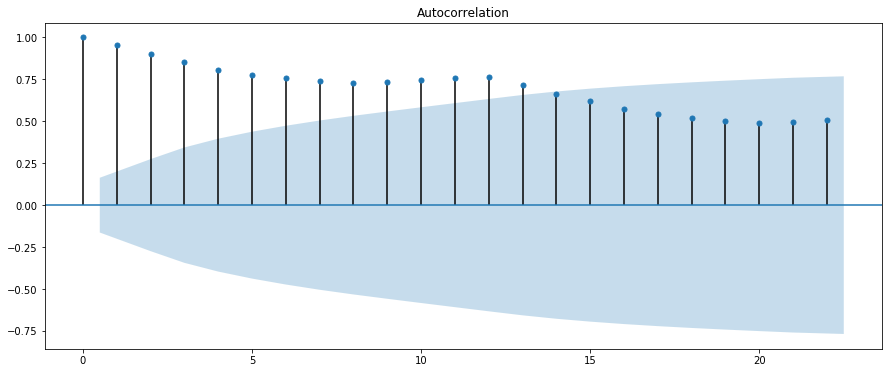

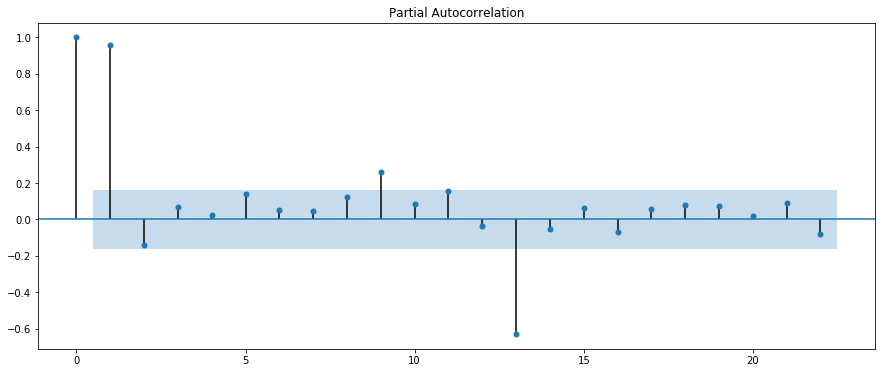

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log) # ACF : Acutocorrelation 그래프 그리기
plot_pacf(ts_log) # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

아래 그림은 **ACF를 통해 MA 모델의 시차 q를 결정하고, PACF를 통해 AR 모델의 시차 p를 결정**할 수 있음을 통계학적으로 설명하는 아티클에서 요약결론 부분만 가져온 것입니다.

![img](https://aiffelstaticprd.blob.core.windows.net/media/images/E-16-4.max-800x600.png)

이 결론에 따라 보자면 `PACF` 그래프를 볼 때 `p=1`이 매우 적합한 것 같습니다. `p`가 2 이상인 구간에서 `PACF`는 거의 0에 가까워지고 있기 때문입니다. <u>PACF가 0이라는 의미는 현재 데이터와 p 시점 떨어진 이전의 데이터는 상관도가 0, 즉 아무 상관 없는 데이터이기 때문에 고려할 필요가 없다는 뜻입니다.</u>

반면 ACF는 점차적으로 감소하고 있어서 `AR(1)` 모델에 유사한 형태를 보이고 있습니다. `q`에 대해서는 적합한 값이 없어 보입니다. `MA`를 고려할 필요가 없다면 `q=0`으로 둘 수 있습니다. 하지만 `q`를 바꿔 가면서 확인해 보는 것도 좋겠습니다.

`d`를 구하기 위해서는 좀 다른 접근이 필요합니다. d차 차분을 구해 보고 이때 시계열이 안정된 상태인지를 확인해 보아야 합니다.

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


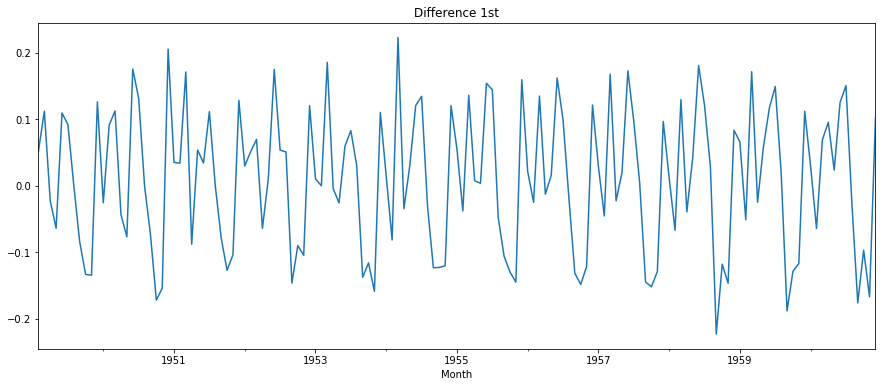

In [46]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


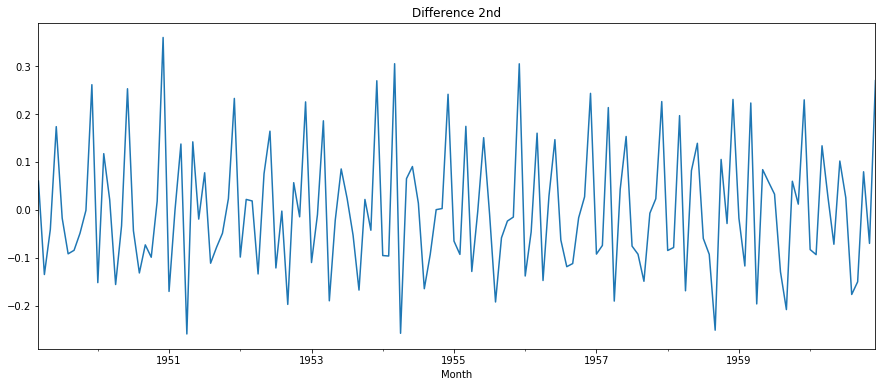

In [47]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title="Difference 2nd")

augmented_dickey_fuller_test(diff_2)

이번 경우에는 1차 차분을 구했을 때 약간 애매한 수준의 안정화 상태를 보였습니다. 2차 차분을 구했을 때는 확실히 안정화 상태였지만 이번 경우에는 d=1로 먼저 시도해 볼 수 있을 것 같습니다. d 값도 바꿔 가면서 최적의 값을 찾아보기를 권합니다.


## 학습데이터 분리

아래와 같이 시계열 데이터에서 학습 데이터와 테스트 데이터를 분리해 봅시다. 분리 비율은 학습과 테스트에 9:1로 하겠습니다. 시계열 예측이니만큼 가장 나중 데이터를 테스트용으로 사용하는 것이 타당할 것입니다.



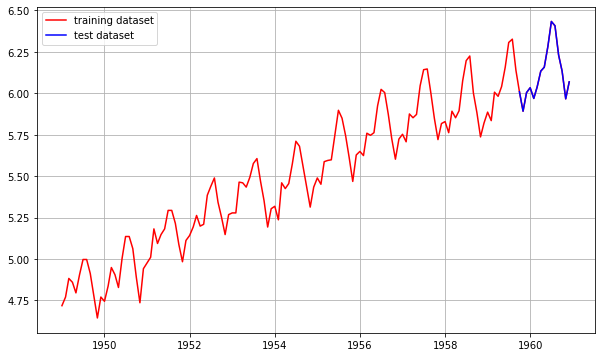

In [48]:
train_data, test_data = ts_log[:int(len(ts_log) * 0.9)], ts_log[int(len(ts_log)*0.9):]

plt.figure(figsize = (10, 6))
plt.grid(True)

# train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log 선택
plt.plot(ts_log, c='r', label='training dataset')
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

plt.show()

아래와 같이 데이터셋의 형태를 확인해 봅시다.


In [50]:
print(ts_log[:2])

print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


# ARIMA 모델 훈련과 추론

위에서 우리는 일단 p=1, d=1, q=0을 모수로 가지는 ARIMA 모델을 우선적으로 고려하게 되었습니다. ARIMA 모델을 훈련하는 것은 아래와 같이 간단합니다.

In [51]:
from statsmodels.tsa.arima_model import ARIMA

# 모델 Build
model = ARIMA(train_data, order=(1, 1, 0))
fitted_m = model.fit(disp=-1)
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  128
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 108.023
Method:                       css-mle   S.D. of innovations              0.104
Date:                Thu, 13 Aug 2020   AIC                           -210.046
Time:                        13:57:33   BIC                           -201.490
Sample:                    02-01-1949   HQIC                          -206.570
                         - 09-01-1959                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0108      0.011      0.972      0.331      -0.011       0.033
ar.L1.D.Passengers     0.1754      0.088      1.994      0.046       0.003       0.348
                    

/home/aiffel0039/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/aiffel0039/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


훈련데이터에 대해 ARIMA 모델이 잘 fit하는지 시각적으로 확인해 보겠습니다.

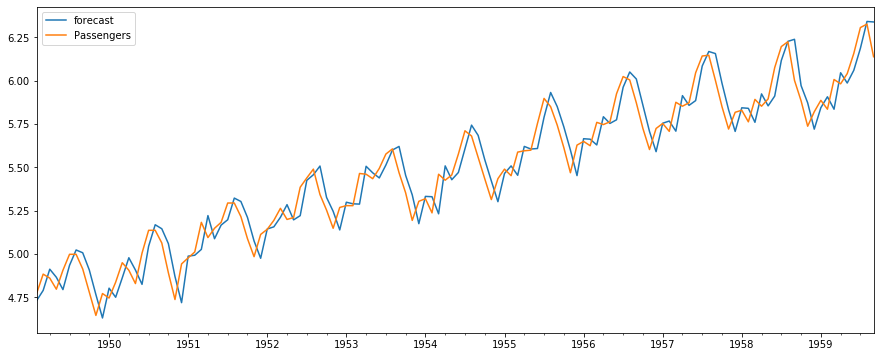

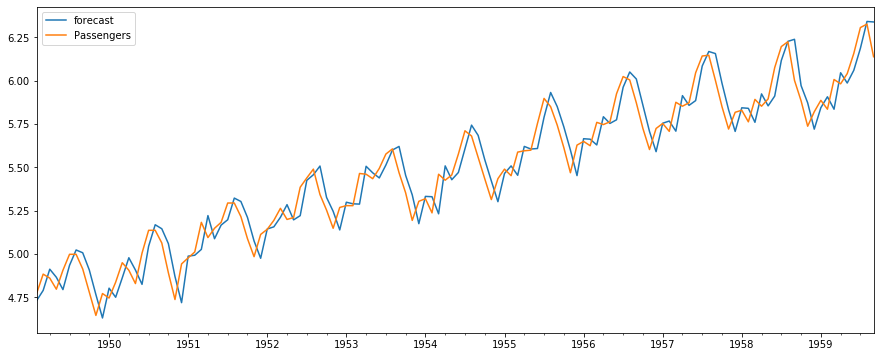

In [52]:
fitted_m.plot_predict()

forecast() 메소드를 이용해 테스트 데이터 구간의 데이터를 예측해 봅니다.

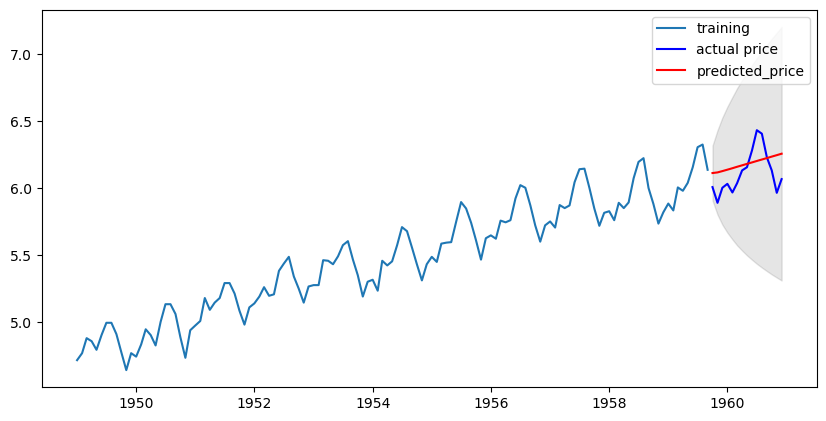

In [54]:
# Forecast : 결과가 fc에 담깁니다.
fc, se, conf = fitted_m.forecast(len(test_data), alpha = 0.05) # 95% conf

# Make as Pandas Series
fc_series = pd.Series(fc, index = test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index) # 예측 결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index) # 예측 결과의 상한 바운드

# Plot
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r', label='predicted_price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

최종적인 모델의 오차율을 계산하려면, 그동안 로그 변환된 시계열을 사용해 왔던 것을 모두 지수 변환하여 원본의 스케일로 계산해야 타당합니다. `np.exp()`를 통해 전부 원본 스케일로 돌린 후 `MSE`, `MAE`, `RMSE`, `MAPE`를 계산해 보았습니다.

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print("MSE : ", mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print("MAE : ", mae)

rmse = math.sqrt(mse)
print("RMSE : ", rmse)

mape = np.mean(np.abs(np.exp(fc)-np.exp(test_data))/np.abs(np.exp(test_data)))
print("MAPE : {:.2f}%".format(mape*100))

MSE :  5409.550148511177
MAE :  63.13692396363584
RMSE :  73.5496441086643
MAPE : 14.08%


최종적으로 <u>예측 모델의 메트릭으로 활용하기에 적당한 [MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) 기준으로 14% 정도의 오차율</u>을 보입니다. 썩 만족스럽지 않은데, 더 적당한 모수를 찾을 수 있다면 개선의 여지가 있을지 모르겠습니다. `q=8`을 줄 경우 MAPE가 10% 정도로 내려갑니다. `q=12`를 쓸 수 있다면 더욱 좋을 거라는 예상이 되지만 이번 경우에는 데이터셋이 너무 작아 쓸 수 없었습니다.

다음 스텝에서 훨씬 크고 실전적인 데이터셋에 도전해 봅시다!!